<a href="https://colab.research.google.com/github/gundasai/deeplearning/blob/master/alexnet-modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tamato 


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/My Drive/PlantVillage')
os.getcwd()

'/content/drive/My Drive/PlantVillage'

### Datasets and Pre Processing

In [4]:
import keras
import keras
from keras.preprocessing import image
import numpy as np
import pandas as pd
x=[]
y=[]
path='/content/drive/My Drive/PlantVillage/Tomato__Target_Spot'
for i in os.listdir(path):
  img=image.load_img(os.path.join(path,i),color_mode='rgb')
  img=image.img_to_array(img)
  img=img/255.0
  x.append(img)
  y.append(0)
path='/content/drive/My Drive/PlantVillage/Tomato__Tomato_mosaic_virus'
for i in os.listdir(path):
  img=image.load_img(os.path.join(path,i),color_mode='rgb')
  img=image.img_to_array(img)
  img=img/255.0
  x.append(img)
  y.append(1)
x=np.array(x)
y=np.array(y)

Using TensorFlow backend.


In [0]:
from sklearn.utils import shuffle
(x,y)=shuffle(x,y)

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=42)

In [7]:
print(xtrain.shape)
print(ytrain.shape)

print(xtest.shape)
print(ytest.shape)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtrain.ndim)
print(xtrain.dtype)

print(xtest.ndim)
print(xtest.dtype)

(1190, 256, 256, 3)
(1190,)
(587, 256, 256, 3)
(587,)
4
float32
4
float32
4
float32


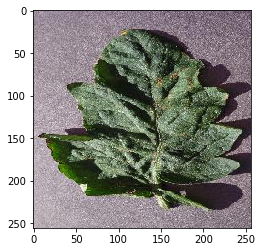

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(xtest[0], cmap='brg')

In [9]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])

1190
256
256


In [0]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [11]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

1.0 1.0
0.0 0.0
1 1
0 0
0.459463
0.18834928
2.869865 2.869865
-2.43942 -2.43942


In [0]:
xtrain = xtrain.reshape(xtrain.shape[0],256,256,3)
xtest =  xtest.reshape(xtest.shape[0],256,256,3)

In [13]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest  =  to_categorical(ytest)
print(ytest[0])

[1. 0.]


### LeNet Model

In [0]:
import keras
from keras import models
from keras import layers

In [15]:
model = models.Sequential()

# 1st Convolutional Layer
model.add(layers.Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(layers.Activation('relu'))
# Max Pooling
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(layers.Activation('relu'))
# Max Pooling
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(layers.Activation('relu'))

# 4th Convolutional Layer
model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(layers.Activation('relu'))

# 5th Convolutional Layer
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(layers.Activation('relu'))
# Max Pooling
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Passing it to a Fully Connected layer
model.add(layers.Flatten())
# 1st Fully Connected Layer
model.add(layers.Dense(4096))
model.add(layers.Activation('relu'))
# Add Dropout to prevent overfitting
model.add(layers.Dropout(0.4))

# 2nd Fully Connected Layer
model.add(layers.Dense(4096))
model.add(layers.Activation('relu'))
# Add Dropout
model.add(layers.Dropout(0.4))

# 3rd Fully Connected Layer
model.add(layers.Dense(1000))
model.add(layers.Activation('relu'))
# Add Dropout
model.add(layers.Dropout(0.4))

# Output Layer
model.add(layers.Dense(2))
model.add(layers.Activation('softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 21, 21, 256)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 256)       0         


### Visualization of randomly initialized filters

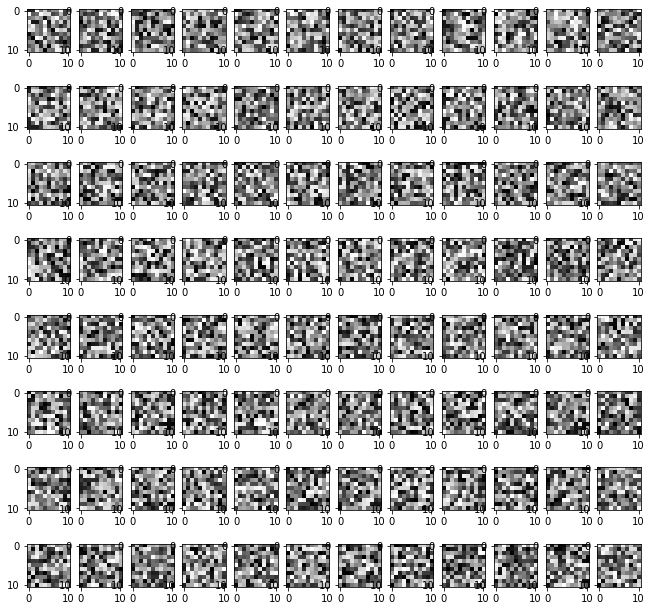

In [16]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 12
row_size = 8
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(11,11))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [17]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

[[-0.01790156 -0.01627574  0.02162339  0.0003377   0.01289495 -0.0060059
   0.00181412  0.00143319  0.02072638 -0.00978627 -0.01049252]
 [ 0.02217689 -0.00661653 -0.00383284  0.02146455  0.01537768  0.01621982
  -0.01037491 -0.00683389  0.00977457 -0.01148749  0.01037184]
 [-0.00196172  0.00145116  0.00872453  0.00353742 -0.01931691  0.00092907
   0.01597251  0.0222097  -0.00124251  0.00844859 -0.00109251]
 [ 0.01948066 -0.01826137 -0.01899862 -0.00371721  0.02223786 -0.0187498
   0.01598017 -0.00312142  0.01438997 -0.01464111  0.01054568]
 [ 0.01143026  0.01969107  0.0004142  -0.00472     0.01199587 -0.0158338
   0.00405254 -0.00413624 -0.01563945 -0.00777883  0.0106796 ]
 [ 0.01821377  0.01539272  0.00228577 -0.00406249  0.02206763 -0.0038239
  -0.02163161  0.01807641  0.01134488  0.01515577 -0.01382192]
 [-0.01936599 -0.00553027  0.00150244 -0.00480739  0.01501684  0.00211529
  -0.01225332 -0.01100598 -0.00271542 -0.00804747  0.00464433]
 [-0.00891669 -0.0223471   0.02143224  0.0175

In [0]:
weight_conv2d_2 = model.layers[3].get_weights()[0][:,:,0,:]

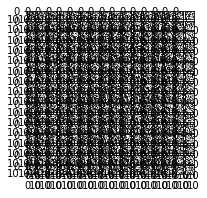

In [19]:
weight_conv2d_2 = model.layers[3].get_weights()[0][:,:,0,:]
#plt.axis=("OFF")
col_size = 16
row_size = 16
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(3,3))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [20]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])

[[-8.61204602e-03  5.06834313e-03 -4.79444908e-03 -1.12554803e-03
  -1.09725753e-02 -9.04252753e-03 -1.03647737e-02 -5.16389543e-03
  -5.48919663e-04 -1.26135722e-03  4.79475409e-03]
 [-7.86660425e-03 -1.04456712e-02 -4.69135446e-03 -3.01447045e-03
   8.11637938e-03  1.00444369e-02 -7.34886155e-04  3.44771147e-03
  -1.04670590e-02  6.27366826e-03 -4.18461300e-03]
 [ 7.69265182e-03  7.50229321e-03 -4.03883401e-03  1.73422508e-04
  -2.88882572e-03 -7.38883391e-05  8.08842480e-04  4.39576246e-03
  -8.45063291e-03  3.34712956e-03  2.95315776e-03]
 [-1.00103980e-02  4.87946905e-03 -4.36399505e-03 -3.47413030e-03
  -2.26182956e-03 -5.81890345e-03 -1.04009239e-02 -6.13063388e-03
   8.65994766e-03  5.29095531e-03 -7.40109943e-04]
 [ 4.93784249e-03 -5.09366626e-03 -2.11416651e-03  8.15710053e-03
   4.59828414e-03  3.96872871e-03 -1.16109774e-02 -1.01727648e-02
  -7.48483650e-03  8.84616747e-03  1.18511952e-02]
 [-7.87271932e-03 -1.04880361e-02  1.08368229e-02 -1.00661302e-02
  -2.44147237e-03 -

In [0]:
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

### Compile and Training the model

In [22]:
os.chdir('/content/drive/My Drive/PlantVillage')

print(os.getcwd())

from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

mc = ModelCheckpoint('CNN_MNIST.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

filepath = "saved-model-{epoch:02d}.h5"

#mc1 = ModelCheckpoint(filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True  ,period=10)

cv = keras.callbacks.CSVLogger('CNN_MNIST.csv', separator=',', append=False)

#rp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=15, verbose=0, mode='auto', min_delta=0.00)

#es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

/content/drive/My Drive/PlantVillage


In [26]:
from keras import optimizers
sgd = optimizers.SGD(lr=0.01,momentum=0.6)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=['accuracy'])
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=20, verbose=1)

Train on 952 samples, validate on 238 samples
Epoch 1/20
952/952 [==============================] - 3s 3ms/step - loss: 0.7693 - acc: 0.6922 - val_loss: 0.4525 - val_acc: 0.8235

Epoch 00001: val_loss did not improve from 0.21291
Epoch 2/20
952/952 [==============================] - 2s 2ms/step - loss: 0.4891 - acc: 0.7836 - val_loss: 0.3796 - val_acc: 0.8235

Epoch 00002: val_loss did not improve from 0.21291
Epoch 3/20
952/952 [==============================] - 2s 2ms/step - loss: 0.3952 - acc: 0.8088 - val_loss: 0.2814 - val_acc: 0.8950

Epoch 00003: val_loss did not improve from 0.21291
Epoch 4/20
952/952 [==============================] - 2s 2ms/step - loss: 0.3225 - acc: 0.8603 - val_loss: 0.2180 - val_acc: 0.9286

Epoch 00004: val_loss did not improve from 0.21291
Epoch 5/20
952/952 [==============================] - 2s 2ms/step - loss: 0.2561 - acc: 0.8918 - val_loss: 0.2050 - val_acc: 0.9118

Epoch 00005: val_loss improved from 0.21291 to 0.20496, saving model to CNN_MNIST.h5


### Evaluate

In [27]:
model.evaluate(xtest,ytest)

587/587 [==============================] - 1s 2ms/step


[0.07001496276199846, 0.9710391822827938]

### Prediction

In [0]:
pred=model.predict(xtest[0].reshape(1,256,256,3))
print(pred)
print(pred.argmax())

In [0]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_loss)
print(test_acc)

### Loss and Accuracy Curves

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(len(train_loss))

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
%matplotlib inline
for i in range(10):
    pred = model.predict(xtest[i].reshape(1, 256, 256, 3))
    print(""+str(i+1)+" Actual is "+ " " + str(ytest[i])+" Predicted is "+str(pred.argmax()))

In [0]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## Visualization

In [0]:
for layer in model.layers:
  print(layer)

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(xtrain[10].reshape(1,256,256,3))

In [0]:
def display_activation(activations, col_size, row_size, act_index):
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3.5,col_size*2.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
len(activations)
#activations
print(activations[0].shape)
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)

In [0]:
print(activations[0].shape)
display_activation(activations,3,2,0)

In [0]:
print(activations[1].shape)
display_activation(activations,3,2,1)

In [0]:
print(activations[2].shape)
display_activation(activations,4,4,2)

In [0]:
print(activations[3].shape)
display_activation(activations,4,4,3)

In [0]:
weight_conv2d_1 = model.layers[0].get_weights()[0][:,:,0,:]
 
col_size = 3
row_size = 2
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(5,5))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_1[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_1[:,:,0])
print("")
print(weight_conv2d_1[:,:,1])
print("")
print(weight_conv2d_1[:,:,2])
print("")
print(weight_conv2d_1[:,:,3])
print("")
print(weight_conv2d_1[:,:,4])
print("")
print(weight_conv2d_1[:,:,5])

In [0]:
weight_conv2d_2 = model.layers[2].get_weights()[0][:,:,0,:]
col_size = 4
row_size = 4
filter_index = 0
fig, ax = plt.subplots(row_size, col_size, figsize=(12,8))
for row in range(0,row_size): 
  for col in range(0,col_size):
    ax[row][col].imshow(weight_conv2d_2[:,:,filter_index],cmap="gray")
    filter_index += 1

In [0]:
print(weight_conv2d_2[:,:,0])
print("")
print(weight_conv2d_2[:,:,1])
print("")
print(weight_conv2d_2[:,:,2])
print("")
print(weight_conv2d_2[:,:,3])
print("")
print(weight_conv2d_2[:,:,4])
print("")
print(weight_conv2d_2[:,:,5])
print("")
print(weight_conv2d_2[:,:,6])
print("")
print(weight_conv2d_2[:,:,7])
print("")
print(weight_conv2d_2[:,:,8])
print("")
print(weight_conv2d_2[:,:,9])
print("")
print(weight_conv2d_2[:,:,10])
print("")
print(weight_conv2d_2[:,:,11])
print("")
print(weight_conv2d_2[:,:,12])
print("")
print(weight_conv2d_2[:,:,13])
print("")
print(weight_conv2d_2[:,:,14])
print("")
print(weight_conv2d_2[:,:,15])